### ACC, APL & Small Worldness

In [ ]:
paths = [{"marker": 'o',"label": "gsw", "path": "results/gsw-ppo/result/history0.txt"},
         {"marker":'^',"label": "nsw", "path":"results/nsw-ppo/result/history0.txt"}, 
         {"marker":'x',"label": "ppo", "path":"results/ppo/result/history0.txt"}]

## Simulation Results

In [ ]:
paths = [
    {
        "marker": 'o',
    	"label": "gsw", 
        "ppath": "results/gsw-ppo/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
        
    },
	{
        "marker":'^',
        "label": "nsw", 
        "ppath":"results/nsw-ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    }, 
	{	
        "marker":'x',
        "label": "ppo", 
        "ppath":"results/ppo/result/",
        "direct-cl": "direct/direct-cl-performance.npy",
        "direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/0-performance.npy",
		"leach": "",
		
		
    },
	{	
        "marker":'s',
        "label": "conventional", 
        "ppath":"results/conventional/result/",
		"direct-cl": "direct/direct-cl-performance.npy",
		"direct-fl": "direct/direct-fl-performance.npy",
		"multihop-cl": "multihop/cl-performance.npy",
		"multihop-fl": "multihop/fl-performance.npy",
		"leach": "",
		
    },
]

In [ ]:
from itertools import zip_longest

### Latency

For Centralised Learning

### Energy

Centralised Learning

### Throughput

Centralised Learning

In [ ]:
from network import *
net1 = network(50,50,10,0,0)
net1.initialise_nodes(0.25,0)
net1.set_parameters(2000, 8, 2000, 3*1e8, 5)
net1.set_nxg()
net1.show_graph()

In [ ]:
net = net1
e = 0
for Node in net.node_list:
	Node.critical_energy = 0.0
	e += Node.current_energy

In [ ]:
net.packet_length = 1024
sink = net.sink
dead_node = set()
k = net.packet_length
rnds = 0

In [ ]:
er = sink.energy_for_reception(k)
n = net.number_of_nodes
n_map = net.node_map
net.calculate_latency()
lm = net.latency_matrix
dm = net.calculate_dist()
energy_per_round = [e]
latency_per_round = []
throughput_per_round = []
total_latency = 0

In [ ]:
from networkx import NetworkXError
while len(dead_node) < 0.9*n:
	message_gen = n - len(dead_node)
	s_trans = 0
	e = 0
	l = 0
	failed_msg = 0
	for node in net.node_list:
		if node in dead_node:
			continue
		path = nx.shortest_path(net.nxg, 0, node.id)
		path.reverse()
		curr = net.node_map[path.pop()]
		fail = 0
		while len(path) != 0:
			next = net.node_map[path.pop()]
			if next.current_energy < next.critical_energy or curr.current_energy < curr.critical_energy:
				fail = 1
				break
			l += lm[curr.id][next.id]
			curr.current_energy -= curr.energy_for_transmission(k, next.dist(curr))
			next.current_energy -= er
			curr = next
		if curr != sink or fail == 1:
			et = node.energy_for_transmission(k, dm[node.id][sink.id])
			if et > node.current_energy:
				failed_msg += 1
				dead_node.add(node)
				try:
					net.nxg.remove_node(node)
				except NetworkXError:
					print(node.id)
			else:
				node.current_energy -= et
				s_trans += 1
				continue
	for node in net.node_list:
		e += max(node.current_energy, node.critical_energy)
		if node.current_energy <= node.critical_energy:
			dead_node.add(node)
			
	latency_per_round.append(l)
	energy_per_round.append(e)
	throughput_per_round.append([message_gen, s_trans, s_trans/message_gen, failed_msg])
	total_latency+= l
	e = 0
	l = 0
	s_trans = 0
	failed_msg=0
	rnds += 1

In [ ]:
plt.plot([x[-2] for x in throughput_per_round])

In [ ]:
from numpy.random import normal 
cnt = 10
for _ in range(2):
	x = normal(0, 0.5, cnt)
	cnt = 0
	for i in range(len(x)):
		x[i] = round(x[i], 2)
		if x[i] <= 0.96 and x[i] >= -0.96:
			cnt += 1
	# print(x)
	
	print(cnt)

In [ ]:
import matplotlib.pyplot as plt
x = normal(15, 2, 100)
plt.hist(x)

In [ ]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [ ]:
X = get_truncated_normal(17, 3, 0, 22)


In [ ]:
X.rvs()


In [ ]:
net1 = network(50,50,20,0,0)
net1.initialise_nodes(0.25,0)
net1.set_parameters(2000, 256, 2000, 3*1e8, 5)
net1.set_nxg()
net1.show_graph()


net1.packet_length=64
packets=25

for n in net1.node_list:
	n.initial_energy=2.5
	n.critical_energy = 0.0
	n.set_packets(packets)


In [11]:
# Direct CODE

# from network import *
# from node import *
# import network as nx
# import math

def drop_packs(trasn_packs):
	return max(math.floor(normal(trasn_packs*0.07, 2)),0)

def node2NodeTransmission(curr, next):
	et = curr.energy_for_transmission(k, next.dist(curr))
	transferred_packets = min(curr.packets_this_rnd, math.ceil(curr.current_energy/et))
	curr.current_energy -= (transferred_packets*et)
	dropped_p = drop_packs(transferred_packets)
	received_packets = max(transferred_packets - dropped_p, 0)
	next.current_energy -= (received_packets*er)
	next.packets_this_rnd += received_packets
	return lm[curr.id][next.id]

# net = network(500, 500, 400, 0, 0)
# path = "results/network_data/network1network_data.npy"
# parent_dir = "./results/conventional/result"
# gd=net.load_network(path,1)


# net.packet_length=128
# packets=50

# for n in net.node_list:
# 	n.curent_energy= 25
# 	n.critical_energy = 0.0
# 	n.set_packets(packets)

# net=net1
# net.show_graph()


net = network(50,50,20,0,0)
net.initialise_nodes(2.5,0)
net.set_parameters(2000, 256, 2000, 3*1e8, 5)
net.set_nxg()
# net.show_graph()


net.packet_length=64
packets=25

for n in net.node_list:
	n.initial_energy=2.5
	n.critical_energy = 0.0
	n.set_packets(packets)




dead_nodes=set()
N = net.number_of_nodes
k = net.packet_length
sink = net.sink
rnd = 0
net.calculate_latency()
lm = net.latency_matrix
e_r = []
l_r = []
th_r = []
avg_lat_r = []
live_nodes = []
rnds=0

total_latency=0
rnd_latency=0
er = sink.energy_for_reception(k)

while len(dead_nodes) < 0.9*N:
	message_gen = (N - len(dead_nodes))*packets
	e=0
	l=0
	sink.packets_this_rnd=0
	for Node in net.node_list:
		if Node.id in dead_nodes:
			continue
		Node.set_packets(packets)
		try:
			path=nx.shortest_path(net.nxg, Node.id, 0)
		except:
			pass
		finally:
			l+= node2NodeTransmission(Node,sink)
			if Node.current_energy < Node.critical_energy:
				dead_nodes.add(Node.id)
				net.nxg.remove_node(Node.id)
		e += max(Node.current_energy, Node.critical_energy)
	l_r.append(l)
	e_r.append(e)
	th_r.append([message_gen, sink.packets_this_rnd, round(sink.packets_this_rnd/message_gen, 3)])
	live_nodes.append(N - len(dead_nodes))
	rnds += 1

print(rnds)

ld, ed, td = l_r, e_r, th_r
liveD = live_nodes

3122


In [12]:
from network import *
import math
from numpy.random import normal
from networkx.exception import NetworkXNoPath

hist = []
def drop_packs(trasn_packs):
	return max(math.floor(normal(trasn_packs*0.07, 2)),0)

def node2NodeTransmission(curr, next):
	et = curr.energy_for_transmission(k, next.dist(curr))
	transferred_packets = min(curr.packets_this_rnd, math.ceil(curr.current_energy/et))
	curr.current_energy -= (transferred_packets*et)
	dropped_p = drop_packs(transferred_packets)
	hist.append([transferred_packets, dropped_p])
	received_packets = max(transferred_packets - dropped_p, 0)
	next.current_energy -= (received_packets*er)
	next.packets_this_rnd += received_packets
	return lm[curr.id][next.id]

def add_dead_node(c):
	if c.current_energy < c.critical_energy:
		dead_nodes.add(c.id)
		try:
			net.nxg.remove_node(Node.id)
		except:
			pass
	return c.current_energy < c.critical_energy

# net = network(500, 500, 400, 0, 0)
# path = "results/ppo/result/0-graph_data.npy"
# parent_dir = "results/fsw-ppo/"
# graph_data = net.load_network(path, 0)
# net.show_graph()
# #initialises node

# #initial residual energy:
# net.packet_length=64
# packets = 25

# for n in net.node_list:
# 	n.current_energy = 25
# 	n.critical_energy = 0.0
# 	n.set_packets(packets)




net = network(50,50,20,0,0)
net.initialise_nodes(2.5,0)
net.set_parameters(2000, 256, 2000, 3*1e8, 5)
net.set_nxg()
# net.show_graph()


net.packet_length=64
packets=25

for n in net.node_list:
	n.initial_energy=2.5
	n.critical_energy = 0.0
	n.set_packets(packets)

# net=net1
# net.show_graph()
dead_nodes = set()
N = net.number_of_nodes
k = net.packet_length
sink = net.sink
net.calculate_latency()
er = sink.energy_for_reception(k)
lm=net.latency_matrix
dm=net.calculate_dist()
e_r = []
l_r= []
th_r= []
live_nodes = []
rnds=0

while len(dead_nodes) < 0.9*N:
	message_gen = (N - len(dead_nodes))*packets
	e=0
	l=0
	sink.packets_this_rnd=0
	for Node in net.node_list:
		if Node.id in dead_nodes:
			continue
		Node.set_packets(packets)
		try:
			path=nx.shortest_path(net.nxg, Node.id, 0)
			path.reverse()
			while len(path) != 2:
				c = net.node_map[path.pop()]
				n = net.node_map[path[-1]]
				l += node2NodeTransmission(c, n)
				add_dead_node(c)
				if add_dead_node(n):
					break
		except:
			path=[0,Node.id]
		finally:
			curr = net.node_map[path.pop()]
			sink = net.node_map[path[-1]]
			l+= node2NodeTransmission(Node,sink)
			add_dead_node(Node)
		e += max(Node.current_energy, Node.critical_energy)
	l_r.append(l)
	e_r.append(e)
	th_r.append([message_gen, sink.packets_this_rnd, round(sink.packets_this_rnd/message_gen, 3)])
	live_nodes.append(N - len(dead_nodes))
	rnds += 1

print(rnds)

lh, eh, th = l_r, e_r, th_r
liveh = live_nodes

3123


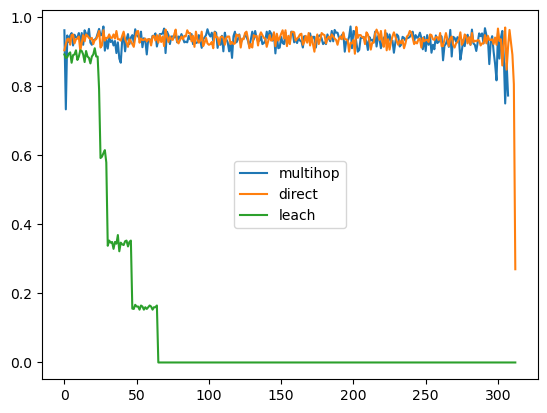

In [9]:
plt.plot([t[-1] for t in th], label = "multihop")
plt.plot([t[-1] for t in td], label = "direct")
plt.plot([t[-1] for t in tl], label = "leach")
plt.legend()

In [ ]:
net.show_graph()